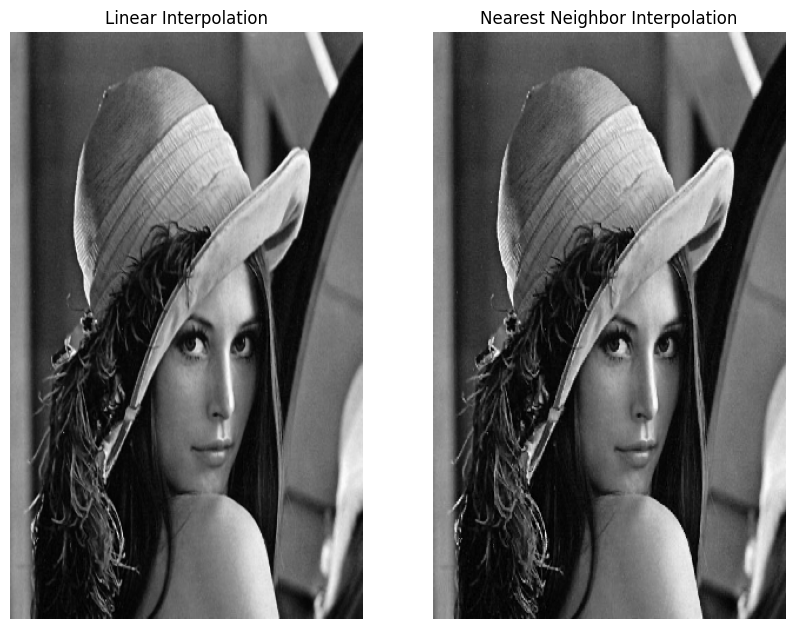

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/image (1).png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
width, height = 300, 500


resized_linear = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

resized_nearest = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(resized_linear)
plt.title('Linear Interpolation')
plt.axis('off')

plt.subplot(122)
plt.imshow(resized_nearest)
plt.title('Nearest Neighbor Interpolation')
plt.axis('off')
plt.show()


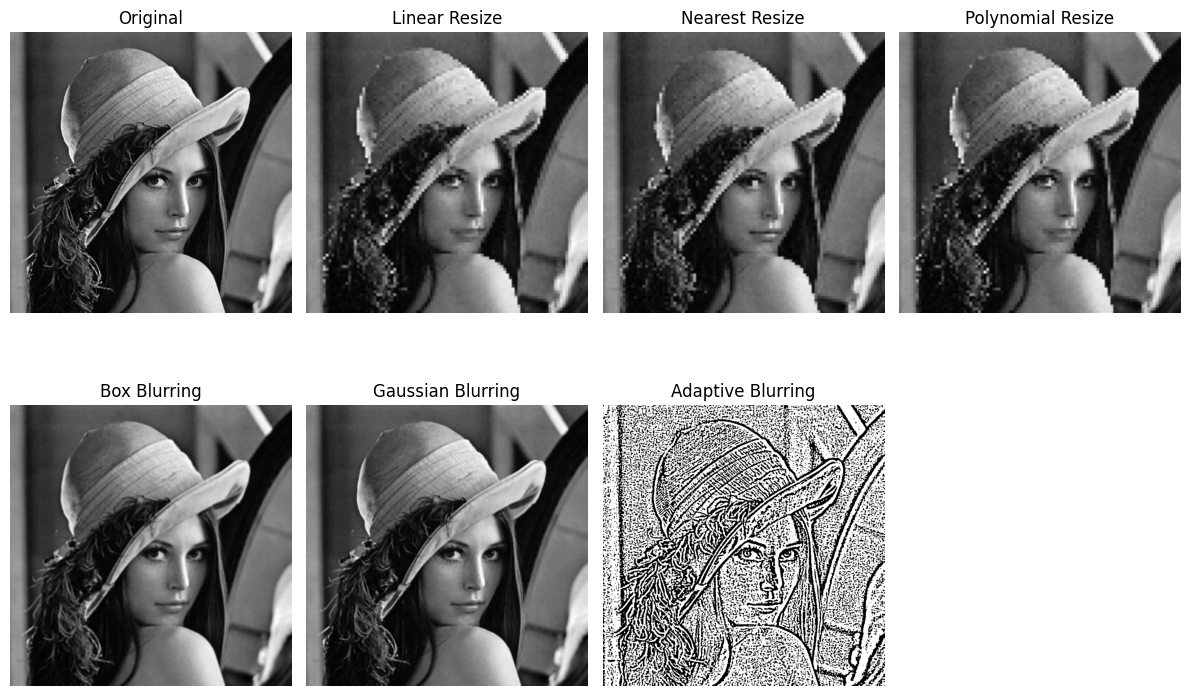

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/image (1).png', cv2.IMREAD_GRAYSCALE)

# Resizing
linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
polynomial_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

#  Blurring
box_blurred = cv2.blur(image, (5, 5))
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Adaptive blurring (example: adaptive thresholding)
adaptive_blurred = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Plot results
titles = ['Original', 'Linear Resize', 'Nearest Resize', 'Polynomial Resize',
          'Box Blurring', 'Gaussian Blurring', 'Adaptive Blurring']
images = [image, linear_resized, nearest_resized, polynomial_resized,
          box_blurred, gaussian_blurred, adaptive_blurred]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Naive Bayes Cross-Validation Accuracy: 0.56 ± 0.01
Random Forest Cross-Validation Accuracy: 0.96 ± 0.00
Results for Naive Bayes:
Accuracy: 0.56
Precision: 0.69
Recall: 0.56
F-Measure: 0.52
Confusion Matrix:
[[1028    1    9    0    0    2   43    1   68   23]
 [   2 1237    7    8    0    3   12    1   41   11]
 [  73   33  371   86    6    7  290    0  295   13]
 [  58   65   15  466    2    5   55   10  423  120]
 [  26    8   13    6  225    6  104    2  231  555]
 [ 124   31    6   22    5   61   52    3  683  117]
 [   9   18    8    2    1    2 1113    0   23    1]
 [   9   11    3   15   13    2    0  353   44  849]
 [  18  145    6    7    3   10   21    1  721  228]
 [   7    3    4    0    5    1    0    9   19 1146]]

Results for Random Forest:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F-Measure: 0.97
Confusion Matrix:
[[1159    0    1    1    3    2    3    0    4    2]
 [   0 1304    5    7    2    0    1    1    0    2]

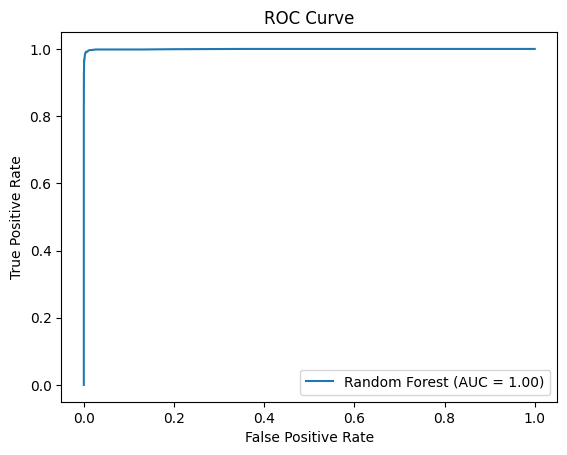

In [12]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

(X, y), (X_test, y_test) = mnist.load_data(path="mnist.npz")

X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X = X / 255.0
X_test = X_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

nb_model = GaussianNB()
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean():.2f} ± {nb_cv_scores.std():.2f}")

rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")


nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F-Measure: {f1_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print()

evaluate_model(y_val, y_pred_nb, "Naive Bayes")
evaluate_model(y_val, y_pred_rf, "Random Forest")

y_proba_rf = rf_model.predict_proba(X_val)
roc_auc = roc_auc_score(y_val, y_proba_rf, multi_class="ovr")
print(f"ROC AUC for Random Forest: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_val, y_proba_rf[:, 0], pos_label=0)
plt.figure()
plt.plot(fpr, tpr, label="Random Forest (AUC = %.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
